# 库

In [1]:
import os, sys, re, json

In [2]:
from vEs import EsProxy

In [2]:
import pandas as pd

In [3]:
from vUtil.vTqdm import tqdm, trange, typeOfScript

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 读取

In [6]:
es = EsProxy()

In [74]:
bodyPaper = lambda year : ({
  "track_total_hits": true, 
  "query": {
    "bool": {
      "must": [
        {"term": {"year": year}},
        {
          "bool": {
            "should": [
              {"match_phrase": {"title": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"abstract": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"keywords": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"title": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"abstract": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"keywords": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"title": {"query": "PEM","slop": 10,"boost":2}}},
              {"match_phrase": {"abstract": {"query": "PEM","slop": 10,"boost":2}}},
              {"match_phrase": {"keywords": {"query": "PEM","slop": 10,"boost":2}}}
              
            ]
          }
        }
      ]
    }
  },
  "size": 10
}, 'landinn_paper')

In [137]:
sum([[],[2]], [])

[2]

In [138]:
[*(1,2) for i in range(2)]

SyntaxError: iterable unpacking cannot be used in comprehension (<ipython-input-138-231736fc00ee>, line 1)

In [140]:
[*es.indices.get_alias('landinn_paper')]

['landinn_paper']

In [75]:
bodyPatent = lambda year : ({
  "track_total_hits": true,
  "query": {
    "bool": {
      "must": [
        {"range": {"applicant_date": {"gte": f"{year}-01-01 00:00:00", "lt": f"{year+1}-01-01 00:00:00", "format": "yyyy-MM-dd HH:mm:ss"}}},
        {
          "bool": {
            "should": [
              {"match_phrase": {"title": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"summary": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"signory": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"title": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"summary": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"signorysignory": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"title": {"query": "PEM","slop": 10,"boost":2}}},
              {"match_phrase": {"summary": {"query": "PEM","slop": 10,"boost":2}}},
              {"match_phrase": {"signory": {"query": "PEM","slop": 10,"boost":2}}}
              
            ]
          }
        }
      ]
    }
  },
  "size": 3
}, 'landinn_patent')

In [52]:
df = pd.DataFrame(columns=['year', 'paper', 'patent', 'total'])

In [53]:
for year in trange(1900, 2022):
    heatPaper = es.search(*bodyPaper(year))['hits']['total']['value']
    heatPatent = es.search(*bodyPatent(year))['hits']['total']['value']
    df.loc[len(df)] = [year, heatPaper, heatPatent, heatPaper + heatPatent]

In [73]:
es.search(*bodyPaper2(2020))

{'took': 51,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 923, 'relation': 'eq'},
  'max_score': 177.84256,
  'hits': [{'_index': 'landinn_paper',
    '_type': '_doc',
    '_id': '1077804245813914496',
    '_score': 177.84256,
    '_source': {'id': 1077804245813914496,
     'title': '钙离子对质子交换膜燃料电池性能衰减机理研究',
     'abstract': '采用试验方法,通过向质子交换膜燃料电池（PEMFC）的电极（阳极和阴极）注入2种浓度（200和500 mg/L）的Ca溶液,研究Ca对PEMFC电化学性能的影响;通过扫描电镜（SEM）,能量散射谱仪（EDS）和电子探针（EPMA）对经Ca污染20 h后的电池性能的衰减机理进行研究。实验结果表明,经200和500 mg/L Ca污染PEMFC阳极20 h后,电池的电化学性能衰减明显,随着Ca浓度的增加,电池电化学性能衰减程度增大;SEM和EDS实验结果表明,经500 mg/L Ca污染PEMFC阳极20 h后,阴、阳两极的气体扩散层分别与阴、阳两极的催化层剥离,在质子交换膜、阳极催化层、阳极气体扩散层以及阴极气体扩散层均发现Ca元素,在质子交换膜上Ca元素含量高于其他部件上;EPMA实验结果表明,Ca污染PEMFC阳极后,Ca元素主要存在于质子交换膜上;研究结果表明,PEMFC电化学性能衰减的机理主要是由于Ca与质子交换膜中的质子发生离子交换反应并取代质子交换膜中的磺酸根基团上的质子形成新的磺酸盐结构所致。',
     'keywords': '质子交换膜燃料电池;钙;衰减;机理;',
     'scholars': '1078191689969441174',
     'year': '2020'}},
   {'_index': 'landinn_paper',
   

In [54]:
df[60:]

,year,paper,patent,total
60,1960,0,0,0
61,1961,0,0,0
62,1962,0,0,0
63,1963,1,0,1
64,1964,2,0,2
...,...,...,...,...
117,2017,1057,376,1433
118,2018,1041,451,1492
119,2019,1198,781,1979
120,2020,1272,518,1790


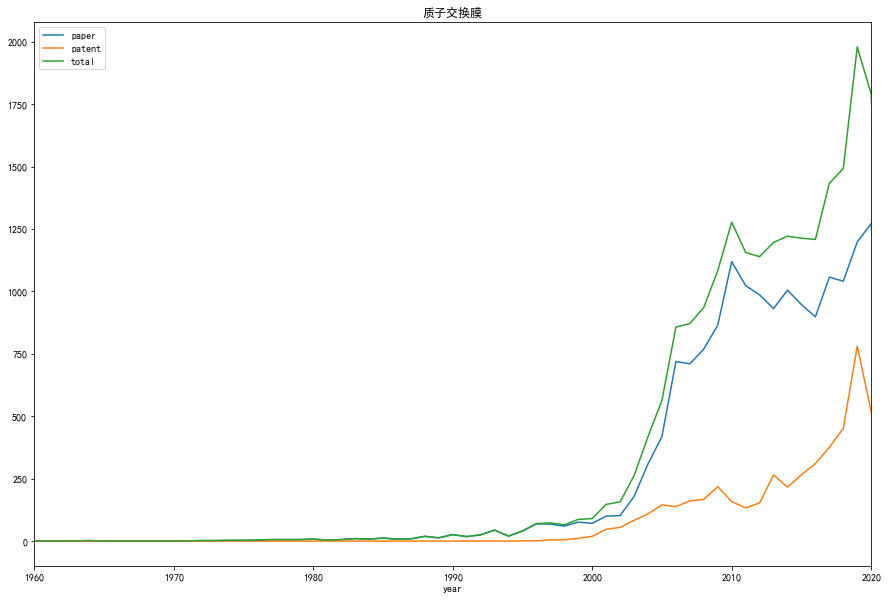

In [55]:
df.plot(x='year', xlim=(1960,2020), figsize=(15,10), title='质子交换膜');

In [41]:
es.close()

In [72]:
bodyPaper2 = lambda year : ({
  "query": {
    "bool": {
      "must": [
        {"term": {"year": year}},
        {
          "bool": {
            "should": [
              {"match_phrase": {"title": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"abstract": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"keywords": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"title": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"abstract": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"keywords": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
            ]
          }
        }
      ]
    }
  },
  "size": 10
}, 'landinn_paper')
bodyPatent2 = lambda year : ({
  "query": {
    "bool": {
      "must": [
        {"range": {"applicant_date": {"gte": f"{year}-01-01 00:00:00", "lt": f"{year+1}-01-01 00:00:00", "format": "yyyy-MM-dd HH:mm:ss"}}},
        {
          "bool": {
            "should": [
              {"match_phrase": {"title": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"summary": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"signory": {"query": "质子交换膜","slop": 10,"boost":2}}},
              {"match_phrase": {"title": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"summary": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
              {"match_phrase": {"signorysignory": {"query": "proton exchange membrane","slop": 10,"boost":2}}},
            ]
          }
        }
      ]
    }
  },
  "size": 3
}, 'landinn_patent')

In [57]:
df2 = pd.DataFrame(columns=['year', 'paper', 'patent', 'total'])
for year in trange(1900, 2022):
    heatPaper = es.search(bodyPaper2(year))['hits']['total']['value']
    heatPatent = es.search(bodyPatent2(year))['hits']['total']['value']
    df2.loc[len(df2)] = [year, heatPaper, heatPatent, heatPaper + heatPatent]

In [59]:
df2[65:]

,year,paper,patent,total
65,1965,0,0,0
66,1966,0,0,0
67,1967,0,0,0
68,1968,0,0,0
69,1969,0,0,0
70,1970,0,0,0
71,1971,0,0,0
72,1972,1,0,1
73,1973,1,0,1
74,1974,2,0,2


In [79]:
df2.to_csv('质子交换膜研究热度.csv', index=False)

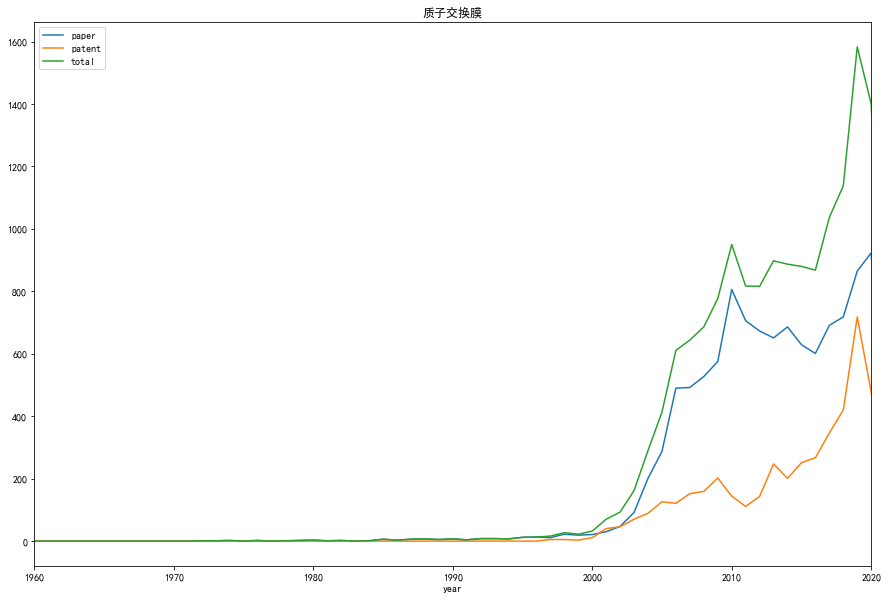

In [62]:
df2.plot(x='year', xlim=(1960,2020), figsize=(15,10), title='质子交换膜');

# 属性变化

## 第一次

Text(0.5, 1.0, '质子交换膜厚度')

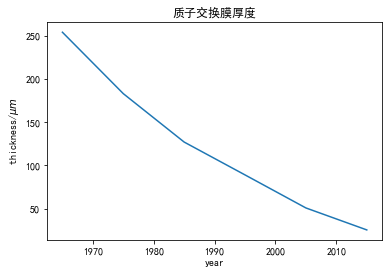

In [101]:
plt.plot([
        1965, 1975, 1985, 1995, 2005, 2015
    ], [
        254,183,127,89,50.8,25.4
    ])

plt.ylabel('thickness/$μm$')
plt.xlabel('year')
plt.title('质子交换膜厚度')

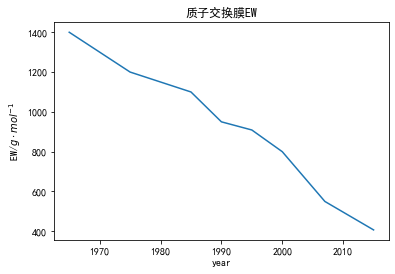

In [108]:
plt.plot([
        1965, 1975, 1985, 1990, 1995, 2000, 2007, 2015
    ], [
        1400,1200,1100,950,909,800,550, 407

    ])

plt.ylabel('EW/$g\cdot mol^{-1}$')
plt.xlabel('year')
plt.title('质子交换膜EW');

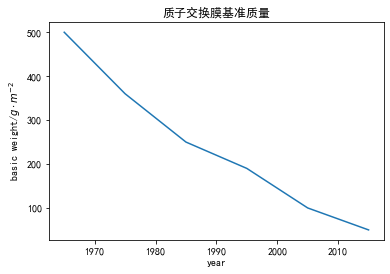

In [109]:
plt.plot([
        1965, 1975, 1985, 1995, 2005, 2015
    ], [
        500,360,250,190,100,50
    ])

plt.ylabel('basic weight/$g\cdot m^{-2}$')
plt.xlabel('year')
plt.title('质子交换膜基准质量');

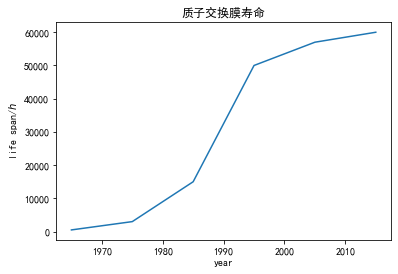

In [110]:
plt.plot([
        1965, 1975, 1985, 1995, 2005, 2015
    ], [
        500,3000,15000,50000,57000,60000
    ])

plt.ylabel('life span/$h$')
plt.xlabel('year')
plt.title('质子交换膜寿命');

## 第二次

Text(0.5, 1.0, 'xx')

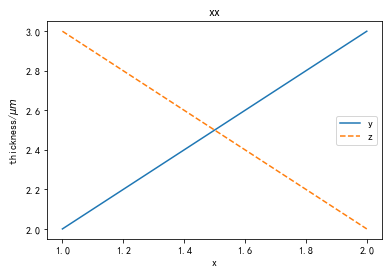

In [19]:
ax=pd.DataFrame({'x' : [1,2], 'y' : [2,3]}).plot(x='x', title='质子交换膜')
pd.DataFrame({'x' : [1,2], 'z' : [3,2]}).plot(x='x', linestyle='--', title='质子交换膜',ax=ax)
ax.set_ylabel('thickness/$μm$')
ax.set_title('xx')

Text(0.5, 1.0, '质子交换膜厚度')

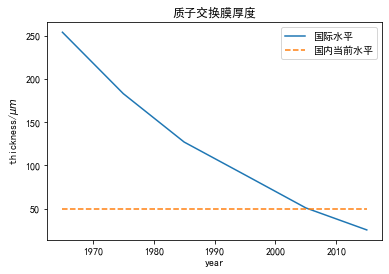

In [24]:
index = [1965, 1975, 1985, 1995, 2005, 2015]

ax = pd.DataFrame({'国际水平' : [254,183,127,89,50.8,25.4]}, index=index).plot()
pd.DataFrame({'国内当前水平' : [50]*6}, index=index).plot(linestyle='--', ax=ax)
ax.set_ylabel('thickness/$μm$')
ax.set_xlabel('year')
ax.set_title('质子交换膜厚度')

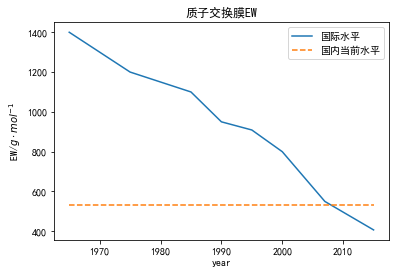

In [31]:
index = [1965, 1975, 1985, 1990, 1995, 2000, 2007, 2015]

ax = pd.DataFrame({'国际水平' : [1400,1200,1100,950,909,800,550, 407]}, index=index).plot()
pd.DataFrame({'国内当前水平' : [530]*8}, index=index).plot(linestyle='--', ax=ax)
plt.ylabel('EW/$g\cdot mol^{-1}$')
plt.xlabel('year')
plt.title('质子交换膜EW');

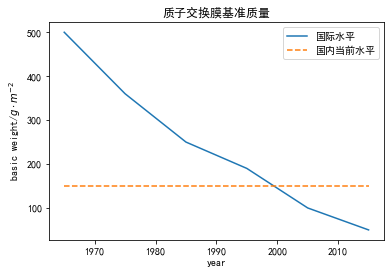

In [34]:
index = [1965, 1975, 1985, 1995, 2005, 2015]

ax = pd.DataFrame({'国际水平' : [500,360,250,190,100,50]}, index=index).plot()
pd.DataFrame({'国内当前水平' : [150]*6}, index=index).plot(linestyle='--', ax=ax)

plt.ylabel('basic weight/$g\cdot m^{-2}$')
plt.xlabel('year')
plt.title('质子交换膜基准质量');

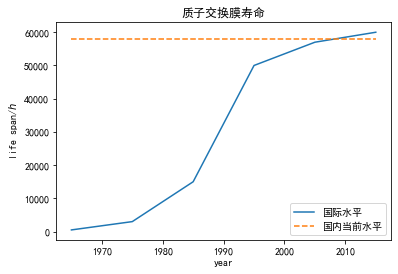

In [35]:
index = [1965, 1975, 1985, 1995, 2005, 2015]
ax = pd.DataFrame({'国际水平' : [500,3000,15000,50000,57000,60000]}, index=index).plot()
pd.DataFrame({'国内当前水平' : [58000]*6}, index=index).plot(linestyle='--', ax=ax)

plt.ylabel('life span/$h$')
plt.xlabel('year')
plt.title('质子交换膜寿命');

# 变xls

In [2]:
from IPython.core.magic import register_cell_magic, register_line_cell_magic

In [14]:
@register_cell_magic
def totab (line, cell):
    print('\n'.join('\t'.join(str(y) for y in eval(x)) for x in cell.split('\n') if x.strip()))

In [15]:
%%totab
[1965, 1975, 1985, 1995, 2005, 2015]
[1965, 1975, 1985, 1990, 1995, 2000, 2007, 2015]
[1965, 1975, 1985, 1995, 2005, 2015]
[1965, 1975, 1985, 1995, 2005, 2015]

1965	1975	1985	1995	2005	2015
1965	1975	1985	1990	1995	2000	2007	2015
1965	1975	1985	1995	2005	2015
1965	1975	1985	1995	2005	2015


# 测试包

In [7]:
from cntPublish import cntPublish

计数质子交换膜的研究变化

In [8]:
keywords = ['质子交换膜', 'proton exchange membrane']

In [10]:
cntPublish(es, *keywords, start=2005)

100%|██████████████████████| 17/17 [00:05<00:00,  3.15it/s]


,year,paper,patent,total
0,2005,287,126,413
1,2006,490,121,611
2,2007,492,152,644
3,2008,527,159,686
4,2009,575,202,777
5,2010,806,144,950
6,2011,706,111,817
7,2012,673,143,816
8,2013,651,247,898
9,2014,686,201,887


In [17]:
b = lambda year : ({
        "query": {
            "bool": {
                "must": [
                    {"term": {"year": year}},
                    {
                        "bool": {
                            "should": sum([
                                [
                                    {"match_phrase": {"title": {"query": k,"slop": 10}}},
                                    {"match_phrase": {"abstract": {"query": k,"slop": 10}}},
                                    {"match_phrase": {"keywords": {"query": k,"slop": 10}}}
                                ] for k in keywords
                            ], [])
                        }
                    }
                ]
            }
        },
    }, 'landinn_paper')

In [18]:
es.count(*b(1999))

{'count': 19,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}}

# 关闭

In [10]:
es.close()